In [439]:
import pyndri
import collections
import io

index = pyndri.Index('index/')

def parse_topics(file_or_files,
                 max_topics=sys.maxsize, delimiter=';'):
    assert max_topics >= 0 or max_topics is None

    topics = collections.OrderedDict()

    if not isinstance(file_or_files, list) and \
            not isinstance(file_or_files, tuple):
        if hasattr(file_or_files, '__iter__'):
            file_or_files = list(file_or_files)
        else:
            file_or_files = [file_or_files]

    for f in file_or_files:
        assert isinstance(f, io.IOBase)

        for line in f:
            assert(isinstance(line, str))

            line = line.strip()

            if not line:
                continue

            topic_id, terms = line.split(delimiter, 1)

            if topic_id in topics and (topics[topic_id] != terms):
                    logging.error('Duplicate topic "%s" (%s vs. %s).',
                                  topic_id,
                                  topics[topic_id],
                                  terms)

            topics[topic_id] = terms

            if max_topics > 0 and len(topics) >= max_topics:
                print("Max capacity reached... Breaking...")
                break

    return topics

with open('./ap_88_89/topics_title', 'r') as f_topics:
    topics = (parse_topics([f_topics]))

In [440]:
topics['51']

'Airbus Subsidies'

In [441]:
import os
import sys
from collections import defaultdict 

# Run evaluation bash script...
# subprocess.call(["./assignment_evals.sh"])


# ... And retrieve again
eval_data = {}
query_ids = {}
# For each file in given directory...
for file in os.listdir("run/TREC_results_on_test_set"):
    
    # Skip directories, DS_Store ghost files and .run files:
    if file != ".DS_Store" and file[-4:] != ".run":
        print(file)
        method = file.split("_")[0]
        with open("run/TREC_results_on_test_set/" + file) as file_obj:
            content = [line.strip().split() for line in file_obj.readlines()]
            
            content_dict = defaultdict(list)
            query_ids, query_len = [], []
            
            for metric, query, score in content:
                content_dict[metric].append(score)
                if query not in query_ids:
                    query_ids.append(query)
            
            for query_id in query_ids:
                if query_id != 'all':
                    query_len.append(len(topics[query_id].split()))
            
            query_len.append(-1)
            content_dict["method"] = len(query_ids) * [method]
            content_dict["query_ids"] = query_ids
            content_dict["query_len"] = query_len
            eval_data[method] = content_dict
            

absolute_0.5_test_queries_len_C_is_num_words.txt
BM25_testqueries.txt
dirichlet_500_test_queries_len_C_is_num_words.txt
jelinek_0.1_test_queries_len_C_is_num_words.txt
LDA_test_topics_75.txt
LSI-TF-IDF_test_topics_500.txt
LSI_test_topics_500.txt
PLM_Gaussian_500_test_.txt
TF-IDF_.txt
W2V_test_5eps.txt


In [442]:
import pandas as pd
from collections import Counter

# IMPOSSIBLE QUERIES:
# Table that contains all queries for which the model returned zero recall@1000:
# Limit results by first 5 queries where 

frames = []

models = list(eval_data.keys())
for model in models:
    data = pd.DataFrame(eval_data[model])
    data = data[data.query_ids != 'all']
    
    # Select all rows where recall@1000 == 0.0
    data = data[data.recall_1000 == '0.0000']
    data = data[['method', 'query_ids', 'query_len', 'num_rel', 'recall_1000', 'recall_500']]
    data = data.sort_values(by=['recall_1000'], ascending=True).head(5)
    frames.append(data)
    
data = pd.concat(frames)

ids = data.query_ids
count = Counter(ids)
for qid, occurence in count.most_common(5):
    print(qid, ":\t\"", topics[qid], "\", occurred", occurence, "times")

with open("no_results_queries.tex", "w") as f:
    f.write(data.to_latex())    

data

65 :	" Information Retrieval Systems ", occurred 9 times
66 :	" Natural Language Processing ", occurred 9 times
109 :	" Find Innovative Companies ", occurred 8 times
105 :	" "Black Monday" ", occurred 7 times
91 :	" U.S. Army Acquisition of Advanced Weapons Systems ", occurred 6 times


,method,query_ids,query_len,num_rel,recall_1000,recall_500
8,absolute,109,3,8,0.0000,0.0000
95,absolute,65,3,0,0.0000,0.0000
96,absolute,66,3,2,0.0000,0.0000
4,BM25,105,2,33,0.0000,0.0000
8,BM25,109,3,8,0.0000,0.0000
95,BM25,65,3,0,0.0000,0.0000
96,BM25,66,3,2,0.0000,0.0000
115,BM25,91,7,5,0.0000,0.0000
8,dirichlet,109,3,8,0.0000,0.0000
95,dirichlet,65,3,0,0.0000,0.0000


In [445]:
# HARD QUERIES:
# Table that contains all queries for which the model returned zero recall@1000:
# Limit results by first 5 queries where 

frames = []

models = list(eval_data.keys())
for model in models:
    data = pd.DataFrame(eval_data[model])
    data = data[data.query_ids != 'all']
    
    # De-select all rows where recall@1000 == 0.0
    data = data[data.recall_1000 != '0.0000']
    data = data[['method', 'query_ids', 'query_len', 'num_rel', 'recall_1000', 'recall_500']]
    data = data.sort_values(by=['recall_1000'], ascending=True).head(5)
    frames.append(data)

    
data = pd.concat(frames)

ids = data.query_ids
count = Counter(ids)
for qid, occurence in count.most_common(5):
    print(qid, ":\t\"", topics[qid], "\", occurred", occurence, "times")

with open("hard_queries.tex", "w") as f:
    f.write(data.to_latex())
    
data

73 :	" Demographic Shifts across National Boundaries ", occurred 9 times
127 :	" U.S.-U.S.S.R. Arms Control Agreements ", occurred 7 times
79 :	" FRG Political Party Positions ", occurred 7 times
191 :	" Efforts to Improve U.S. Schooling ", occurred 7 times
80 :	" 1988 Presidential Candidates Platforms ", occurred 6 times


,method,query_ids,query_len,num_rel,recall_1000,recall_500
102,absolute,73,5,106,0.0094,0.0094
22,absolute,127,4,165,0.0242,0.0121
4,absolute,105,2,33,0.0606,0.0303
97,absolute,67,4,442,0.0724,0.0249
106,absolute,79,4,128,0.0859,0.0469
102,BM25,73,5,106,0.0189,0.0094
74,BM25,191,5,127,0.0472,0.0079
113,BM25,87,8,52,0.0577,0.0577
107,BM25,80,4,168,0.0595,0.0357
97,BM25,67,4,442,0.0611,0.0362


In [446]:
# EASY QUERIES:
# Table that contains all queries for which the model returned zero recall@1000:
# Limits results by first 5 queries

frames = []

models = list(eval_data.keys())
for model in models:
    data = pd.DataFrame(eval_data[model])
    data = data[data.query_ids != 'all']
    data = data[['method', 'query_ids', 'query_len', 'num_rel', 'ndcg_cut_10']]
    data = data.sort_values(by=['ndcg_cut_10'], ascending=False).head(5)
    frames.append(data)
    
data = pd.concat(frames)
ids = data.query_ids
count = Counter(ids)
for qid, occurence in count.most_common(5):
    print(qid, ":\t\"", topics[qid], "\", occurred", occurence, "times")

with open("easy_queries.tex", "w") as f:
    f.write(data.to_latex())

    

data

56 :	" Prime (Lending) Rate Moves, Predictions ", occurred 9 times
183 :	" Asbestos Related Lawsuits ", occurred 5 times
51 :	" Airbus Subsidies ", occurred 5 times
163 :	" Vietnam Veterans and Agent Orange ", occurred 4 times
52 :	" South African Sanctions ", occurred 4 times


,method,query_ids,query_len,num_rel,ndcg_cut_10
66,absolute,183,3,61,1.0000
52,absolute,163,5,78,1.0000
83,absolute,51,2,32,1.0000
84,absolute,52,3,278,1.0000
87,absolute,56,5,284,1.0000
87,BM25,56,5,284,1.0000
52,BM25,163,5,78,1.0000
66,BM25,183,3,61,0.9364
82,BM25,200,9,39,0.9306
75,BM25,193,3,120,0.9306


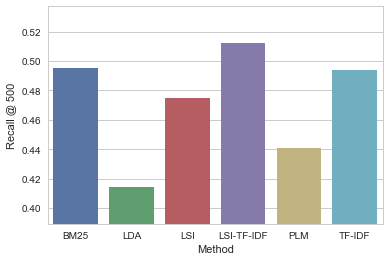

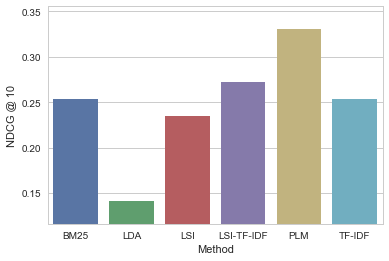

In [528]:
# Plotting performance of models that re-ranked the TF-IDF top 1000 ranking:
import seaborn as sns
import matplotlib.pyplot as plt

frames = []

re_ranked = ['TF-IDF', 'BM25', 'PLM', 'LSI', 'LDA', 'LSI-TF-IDF']

models = list(eval_data.keys())
for model in models:
    data = pd.DataFrame(eval_data[model])
    data = data[data.query_ids == 'all']
    data = data[data.method.isin(re_ranked)]
    data = data[['method', 'map', 'P_5', 'num_rel','recall_1000','recall_500', 'ndcg_cut_10']]
    data = data.sort_values(by=['ndcg_cut_10'], ascending=False).head(5)
    frames.append(data)
    
data = pd.concat(frames)


methods = pd.Series(data.method).astype('category')
scores = pd.Series(data.recall_500).astype('float')

# Plot for Recall@500
ax = sns.barplot(x=methods, y=scores)
ax.set_ylim(min(scores) - .025, max(scores) + .025)
ax.set_ylabel("Recall @ 500")
ax.set_xlabel("Method")
plt.savefig('recall_500_task2_results.png')
plt.show()

# Plot for NDCG@10
methods = pd.Series(data.method).astype('category')
scores = pd.Series(data.ndcg_cut_10).astype('float')

ax = sns.barplot(x=methods, y=scores)
ax.set_ylim(min(scores) - .025, max(scores) + .025)
ax.set_ylabel("NDCG @ 10")
ax.set_xlabel("Method")
plt.savefig('NDCG_10_task2_results.png')
plt.show()



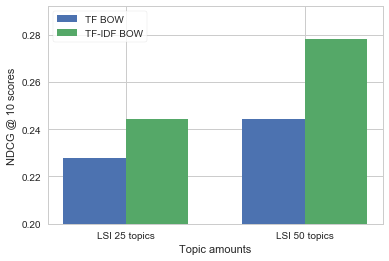

In [532]:
# Plot the impact of rescoring a TF-IDF score for each word in the  TF-IDF's top 1000 ranking:
with open("run/LSI_validation_topics_25.txt") as file_obj:
    contents = [line.strip().split() for line in file_obj.readlines()]
    for content in contents:
        metric, query, score = content
        if query == 'all':
            topics_25_non[metric] = score

with open("run/LSI_validation_topics_50.txt") as file_obj:
    contents = [line.strip().split() for line in file_obj.readlines()]
    for content in contents:
        metric, query, score = content
        if query == 'all':
            topics_50_non[metric] = score

with open("run/LSI_validation_topics_25_tfidf.txt") as file_obj:
    contents = [line.strip().split() for line in file_obj.readlines()]
    for content in contents:
        metric, query, score = content
        if query == 'all':
            topics_25_tfidf[metric] = score

with open("run/LSI_validation_topics_50_tfidf.txt") as file_obj:
    contents = [line.strip().split() for line in file_obj.readlines()]
    for content in contents:
        metric, query, score = content
        if query == 'all':
            topics_50_tfidf[metric] = score

n_groups = 2

non_tfidf = (topics_25_non['ndcg_cut_10'], topics_50_non['ndcg_cut_10'])

tfidf = (topics_25_tfidf['ndcg_cut_10'], topics_50_tfidf['ndcg_cut_10'])

fig, ax = plt.subplots()

index = np.arange(n_groups)
bar_width = 0.35

opacity = 1

rects1 = plt.bar(index, non_tfidf, bar_width,
                 alpha=opacity,
                 label='TF BOW')

rects2 = plt.bar(index + bar_width, tfidf, bar_width,
                 alpha=opacity,
                 label='TF-IDF BOW')

plt.xlabel('Topic amounts')
plt.ylabel('NDCG @ 10 scores')
#plt.title('Scores by LSI topic amount, TF-IDF improvement and metric')
plt.xticks(index + bar_width / 2, ('LSI 25 topics', 'LSI 50 topics'))
plt.ylim(ymin=0.2)
plt.legend(frameon=True)

plt.savefig('tfidf_improvement_LSI.png')
plt.show()


In [451]:
# This cell prints the test set results:


frames = []

names = [
        'Method',
        'MAP @ 1000',
        'Precision @ 5',
        'Recall @ 500',
        'Recall @ 1000',
        'NDCG @ 10'
]

models = list(eval_data.keys())
for model in models:
    data = pd.DataFrame(eval_data[model])
    data = data[data.query_ids == 'all']
    data = data[['method', 'map', 'P_5', 'recall_1000','recall_500', 'ndcg_cut_10']]
    data = data.sort_values(by=['ndcg_cut_10'], ascending=False).head(5)
    frames.append(data)
    
data = pd.concat(frames)
data.columns = names

data

,Method,MAP @ 1000,Precision @ 5,Recall @ 500,Recall @ 1000,NDCG @ 10
120,absolute,0.2045,0.3917,0.6310,0.5412,0.3934
120,BM25,0.1440,0.2650,0.5825,0.4950,0.2538
120,dirichlet,0.2090,0.4167,0.6243,0.5407,0.4052
120,jelinek,0.0057,0.0167,0.1071,0.0680,0.0118
120,LDA,0.0844,0.1417,0.5834,0.4143,0.1412
120,LSI-TF-IDF,0.1598,0.2717,0.5834,0.5121,0.2720
120,LSI,0.1190,0.2333,0.5834,0.4749,0.2353
120,PLM,0.1475,0.3650,0.5834,0.4405,0.3306
120,TF-IDF,0.1436,0.2667,0.5834,0.4938,0.2539
120,W2V,0.2059,0.3950,0.6592,0.5522,0.3983


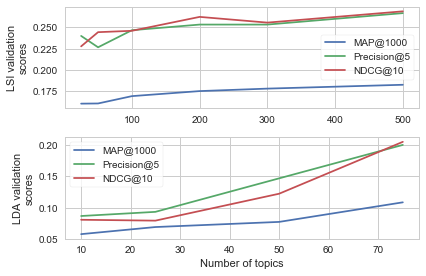

In [530]:
# This prints the effect of the number of topics when training the LSI model on the validation set:

LSI_val_files = ["LSI_validation_topics_25.txt",
                 "LSI_validation_topics_50.txt",
                 "LSI_validation_topics_100.txt",
                 "LSI_validation_topics_200.txt",
                 "LSI_validation_topics_300.txt",
                 "LSI_validation_topics_500.txt"]

LDA_val_files = ['LDA_validation_topics_10.txt',
                 'LDA_validation_topics_25.txt',
                 'LDA_validation_topics_50.txt',
                 'LDA_validation_topics_75.txt']


LSI_results = defaultdict(list)
for file in LSI_val_files:
    
    with open("run/" + file) as file_obj:
        contents = [line.strip().split() for line in file_obj.readlines()]
        
        topics = file.split("_")[-1][:-4]
        LSI_results["topics"].append(topics)
        for content in contents:
            metric, query, score = content
            if query == 'all':
                LSI_results[metric].append(score)
            

LDA_results = defaultdict(list)
for file in LDA_val_files:
    
    with open("run/" + file) as file_obj:
        contents = [line.strip().split() for line in file_obj.readlines()]
        
        topics = file.split("_")[-1][:-4]
        LDA_results["topics"].append(topics)
        for content in contents:
            metric, query, score = content
            if query == 'all':
                LDA_results[metric].append(score)

# Two subplots, the axes array is 1-d
f, axarr = plt.subplots(2)
axarr[0].plot(LSI_results['topics'], LSI_results['map'], label="MAP@1000")
axarr[0].plot(LSI_results['topics'], LSI_results['P_5'], label="Precision@5")
axarr[0].plot(LSI_results['topics'], LSI_results['ndcg_cut_10'], label="NDCG@10")

axarr[0].set(ylabel='LSI validation\nscores')
axarr[0].legend(frameon=True)

axarr[1].plot(LDA_results['topics'], LDA_results['map'], label="MAP@1000")
axarr[1].plot(LDA_results['topics'], LDA_results['P_5'], label="Precision@5")
axarr[1].plot(LDA_results['topics'], LDA_results['ndcg_cut_10'], label="NDCG@10")
axarr[1].legend(frameon=True)
axarr[1].set(ylabel='LDA validation\nscores')

plt.xlabel('Number of topics')
f.tight_layout()
plt.savefig('topic_validation_analysis.png')
plt.show()



In [477]:
LSI_results

defaultdict(list,
            {'P_5': ['0.2400',
              '0.2267',
              '0.2467',
              '0.2533',
              '0.2533',
              '0.2667'],
             'map': ['0.1607',
              '0.1609',
              '0.1695',
              '0.1754',
              '0.1783',
              '0.1828'],
             'ndcg_cut_10': ['0.2278',
              '0.2444',
              '0.2460',
              '0.2623',
              '0.2556',
              '0.2688'],
             'num_rel': ['2593', '2593', '2593', '2593', '2593', '2593'],
             'num_rel_ret': ['1554', '1554', '1554', '1554', '1554', '1554'],
             'recall_1000': ['0.5747',
              '0.5747',
              '0.5747',
              '0.5747',
              '0.5747',
              '0.5747'],
             'topics': ['25', '50', '100', '200', '300', '500']})